In [178]:
# followed from https://www.youtube.com/watch?v=N1vOgolbjSc

In [161]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Pickle package
import pickle

In [162]:
# import and read the data from CSV
recipes = pd.read_csv('muff-cup.csv')
recipes.tail()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
15,Cupcake,38,15,31,8,6,1,1,0
16,Cupcake,36,16,24,12,9,1,1,0
17,Cupcake,34,17,23,11,13,0,1,0
18,Cupcake,54,20,19,12,10,2,0,0
19,Muffin,30,22,20,10,12,2,1,0


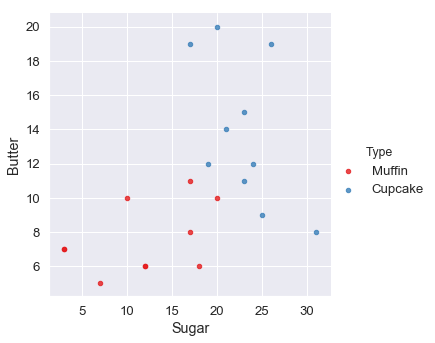

In [163]:
# plot 2 majorly impacted ingredients (by eye-balling) - lmplot is combination of regplot() and FacetGrid.
sns.lmplot('Sugar', 'Butter', data = recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 20})

In [164]:
# specify 2 inputs for the model
sugar_butter = recipes[['Sugar', 'Butter']]
# get the target variable
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [165]:
# Fit the SVM model in linear kernel
model = svm.SVC(kernel='linear')
model.fit(sugar_butter, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [166]:
# Look at the coefficients
print(model.coef_)
print(model.intercept_)

[[0.6 1.2]]
[-24.8]


In [167]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a cupcake recipe!


In [168]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 
                       'muffin_cupcake_features': ['Flour','Sugar'], 
                       'all_features': recipe_features}
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='linear', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}

In [169]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

# S = String
#pickle.dumps(muffin_cupcake_dict)

In [170]:
# train test split
def tt_split(recipes, test_size):
    X = recipes.drop(['Type', 'Salt'], axis=1)
    y = pd.Series(np.where(recipes['Type']=='Muffin', 0, 1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, 
                                                    test_size=test_size, shuffle=True)
    return X_train, X_test, y_train, y_test

In [171]:
X_train, X_test, y_train, y_test = tt_split(recipes, test_size=0.20)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16, 7) (16,) (4, 7) (4,)


In [172]:
# fit the model with all ingredients
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [173]:
# predict test set
y_pred = model.predict(X_test)

In [174]:
# check the accuracy
score = accuracy_score(y_test, y_pred)
print(score)

0.75


# Tune in C, kernel and gamma for SVM model
C parameter - decide how much to penalise misclassified data points
kernel - Linear, Radial Basis Function (RBF), Polynomial, Sigmoid

In [175]:
# tune C
for c_param in [1.0, 2**5, 2**-5]:
    model = svm.SVC(kernel='linear', C=c_param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_pred, y_test))

0.75
0.75
0.75


In [176]:
# multiclass implementation
new_recipe = pd.read_csv('muff-cup-scone.csv')
# decision_function_shape = ovr (one vs rest) / ovo (one vs one) - this might overfit
model = svm.SVC(kernel='linear', decision_function_shape='ovr')
X_train, X_test, y_train, y_test = tt_split(new_recipe, test_size=0.20)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

(20, 7) (20,) (5, 7) (5,)
1.0


In [177]:
# kernel options - Linear, Radial Basis Function (RBF), Polynomial, Sigmoid
model = svm.SVC(kernel='rbf', gamma=2**-5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

1.0
